## Import des librairies et définition des paramètres de planification :

On cherche à optimiser le planning entre DATE_DEBUT et DATE_FIN

on donne un nom d'utilisateur et un id

On précise les fichiers de plage horaire, d'impératifs et les tâches de l'utilisateur :

In [1]:
from Planning import *

DATE_DEBUT = '2020-05-11 08:30:00'
DATE_FIN   = '2020-05-15 18:00:00'

nom_utilisateur = 'ZEUS'
id_utilisateur = 666
plagehoraire_filename = "exemple_horaires.xlsx"
tasks_filename        = "exemple_tâches.xlsx"
imperatifs_filename   = "exemple_impératifs.xlsx"

# Horaires de travail :

In [6]:
pd.read_excel(plagehoraire_filename)

,Nom,Jour,Heure début,Heure fin,Marge début,Marge fin
0,0,0,08:00:00,12:00:00,00:30:00,00:15:00
1,1,0,13:00:00,17:00:00,00:15:00,00:45:00
2,2,1,08:00:00,12:00:00,00:30:00,00:15:00
3,3,1,13:00:00,17:00:00,00:15:00,00:45:00
4,4,2,08:00:00,12:00:00,00:30:00,00:15:00
5,5,2,13:00:00,17:00:00,00:15:00,00:45:00
6,6,3,08:00:00,12:00:00,00:30:00,00:15:00
7,7,3,13:00:00,17:00:00,00:15:00,00:45:00
8,8,4,08:00:00,12:00:00,00:30:00,00:15:00
9,9,4,13:00:00,17:00:00,00:15:00,00:45:00


# Tâches à optimiser :

In [10]:
pd.read_excel(tasks_filename)

,Unnamed: 0,id tache,Objet,Durée,Priorité
0,0,0,Perrot Sébastien | Vacances | TEAMBER (2018-51),1.75,3
1,1,1,BADETS Claude | RE: Teamber | OTCE GROUPE (201...,3.00,7
2,2,2,SAULIERES Vincent | TR: EIFFAGE ROUTE / Cahier...,1.00,13
3,3,3,R2M | Préparer les imports | R2M (2018-90),1.75,5
4,4,4,BADETS Claude | Bilan_Financier.xls | OTCE GRO...,1.00,10
5,5,5,ZANON Stéphane | Formation dernière demi-journ...,3.00,14
6,6,6,TEAMBER | Travail sur structure BD | TEAMBER V...,2.50,18
7,7,7,TEAMBER | rdv chez elle avec Jean-Luc | PROPRI...,3.00,16
8,8,8,Perrot Sébastien | Rdv cardiologue | SNCF (201...,2.50,9
9,9,9,TEAMBER | - | TEAMBER V2 (2019-000066),1.75,21


# Impératifs :

In [11]:
pd.read_excel(imperatifs_filename)

,Objet,Priorité,Date début,Date fin
0,Rdv DENTISTE,IMPERATIF,2020-05-12 10:00:00,2020-05-12 11:00:00
1,Accueil nouvelle recrue,IMPERATIF,2020-05-13 09:30:00,2020-05-13 11:30:00
2,Rdv Expert Comptable,IMPERATIF,2020-05-14 09:00:00,2020-05-14 10:00:00
3,Rdv Banque,IMPERATIF,2020-05-15 14:00:00,2020-05-15 16:00:00
4,Réserver les vacances d'été,IMPERATIF,2020-05-17 16:00:00,2020-05-17 18:00:00
5,Restaurant avec l'équipe,IMPERATIF,2020-05-20 12:00:00,2020-05-20 12:50:00
6,Footing,IMPERATIF,2020-05-22 08:00:00,2020-05-22 09:00:00


## On créé un objet de Planning sur lequel on va pouvoir travailler.

On découpe également les tâches à planifier en morceaux de tâches de maximum 1 (ou autre durée) heure avec la fonction split_tasks.

Remarque : plus on choisie une durée maximale faible, plus il y aura de morceaux et donc plus l'optimisation prendra du temps (linéaire en nombre de morceaux). On pourra mieux combler les trous de l'emploi du temps, ainsi moins de temps sera perdu.
Mais il se peut que l'on perde en continuité dans le travail, c'est à dire que pour réaliser une tâche, on s'y reprendra plus problament plusieurs fois dans la période de sprint.

In [2]:
P = Planning(nom_utilisateur=nom_utilisateur,
        id_utilisateur=id_utilisateur,
        plagehoraire_filename=plagehoraire_filename)

t = pd.read_excel(tasks_filename)
tasks = split_tasks(t,1)#.reset_index(drop=True)
P.addTasks(tasks)
P.initialise(DATE_DEBUT,DATE_FIN)
P.addImperatifs(pd.read_excel(imperatifs_filename))

## On peut changer les pénalités de ce planning afin de changer la façon de l'optimiser, explication :

les pénalités de l'utilisateur $(a,b,c)$  sont telles que $0 < a, b, c$ et $a + b + c = 1$.

- $a$ correspond à la pénalité sur le temps perdu. Si (a,b,c) = (1,0,0) on va minimiser uniquement le temps perdu
- $b$ correspond à la pénalité sur le non respect des priorités. Si (a,b,c) = (0,1,0), le seul objectif sera de respecter les priorités lors de l'optimisation.
- $c$ correspond à la pénalité sur la dispersion d'une tâche. Si (a,b,c) = (0,0,1), le seul objectif sera de faire les tâches en une seule fois. On rappelle que les tâches sont découper en morceaux n'excédant pas une durée maximale.

Par défaut, $(a,b,c)=(1/6,2/3,1/6)$ qui fait un peu tout à la fois, mais dans la cellule suivante on montre comment changer ces réglages :

Remarque : pas obligé de refléchir à ce que $a+b+c=1$, le programme le fait tout seul.

In [3]:
P.setPenalties([1,4,1])
P.penalties

array([0.16666667, 0.66666667, 0.16666667])

## Avant l'optimisation, observons les scores :

In [4]:
P.showScores()

Pourcentage temps perdu : 0.041044776119402986
Non respect priorités : 0.33749999999999997
Score dispersion : 0.0


## Dans la cellule suivante, on lance l'optimisation du planning :

Plus l'énergie totale est proche de 0, plus l'emploi du temps est bon.

On peut voir les graphes en précisant show=True

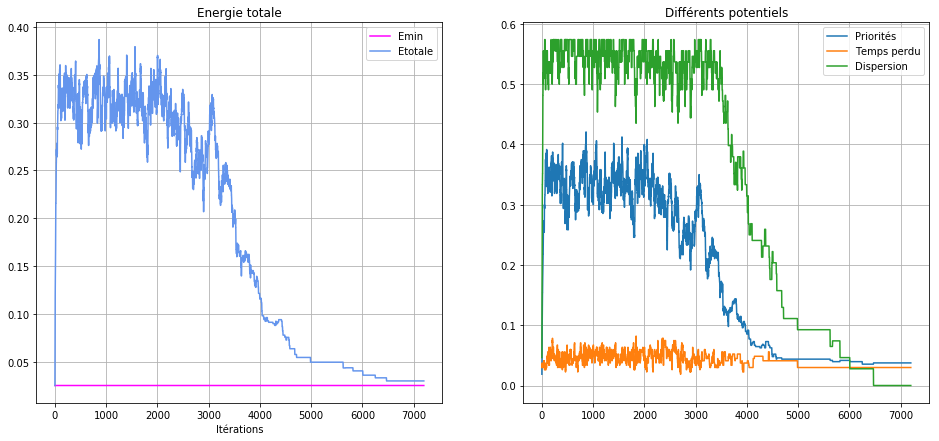

DONE : ZEUS


In [13]:
P.Optimise(show=True)

## On voit le planning optimisé :

en précisant 'to_file=True' dans les arguments de la fonction makePlanning, on peut exporter ce planning au format excel.

In [14]:
P.makePlanning(to_file=False)

,Objet,Priorité,Date début,Date fin
0,LABSOFT | test | DEVELOPPEMENT (2015-1),0,2020-05-11 08:30:00,2020-05-11 11:00:00
1,GARCIA INGENIERIE | RE: TABLEAU DE BORD FACTU ...,4,2020-05-11 11:00:00,2020-05-11 12:00:00
2,GARCIA INGENIERIE | RE: TABLEAU DE BORD FACTU ...,4,2020-05-11 13:00:00,2020-05-11 13:45:00
3,R2M | Préparer les imports | R2M (2018-90),5,2020-05-11 13:45:00,2020-05-11 14:30:00
4,Perrot Sébastien | Vacances | TEAMBER (2018-51),3,2020-05-11 14:30:00,2020-05-11 16:15:00
5,TEAMBER | Spécifications | TEAMBER V2 (2019-00...,6,2020-05-11 16:15:00,2020-05-11 17:00:00
6,TEAMBER | Spécifications | TEAMBER V2 (2019-00...,6,2020-05-12 08:00:00,2020-05-12 09:00:00
7,R2M | Préparer les imports | R2M (2018-90),5,2020-05-12 09:00:00,2020-05-12 10:00:00
8,Rdv DENTISTE,IMPERATIF,2020-05-12 10:00:00,2020-05-12 11:00:00
9,BADETS Claude | RE: Teamber | OTCE GROUPE (201...,7,2020-05-12 11:00:00,2020-05-12 12:00:00


## Après optimisation, observons les scores des différents indicateurs :

In [7]:
P.showScores()

Pourcentage temps perdu : 0.029850746268656716
Non respect priorités : 0.01875
Score dispersion : 0.046296296296296294


## Si certaines tâches n'ont pas pu être planifiées en raison d'un manque de temps sur la période choisie elles se retrouvent ici :

In [12]:
P.notScheduled()

,id morceau,Objet,Durée,Priorité,id tache
0,17,TEAMBER | rdv chez elle avec Jean-Luc | PROPRI...,1.00,16,7
1,24,LABSOFT | Confirmer le nom du répertoire de ma...,0.75,17,10
2,23,LABSOFT | Confirmer le nom du répertoire de ma...,1.00,17,10
3,12,TEAMBER | Travail sur structure BD | TEAMBER V...,1.00,18,6
4,14,TEAMBER | Travail sur structure BD | TEAMBER V...,0.50,18,6
5,13,TEAMBER | Travail sur structure BD | TEAMBER V...,1.00,18,6
6,21,TEAMBER | - | TEAMBER V2 (2019-000066),1.00,21,9
7,22,TEAMBER | - | TEAMBER V2 (2019-000066),0.75,21,9
8,25,KOWALSKI Jean-François | Faire des tests | VER...,1.00,20,11
9,26,KOWALSKI Jean-François | Faire des tests | VER...,1.00,20,11


In [17]:
P.notScheduled()['Durée'].sum()

11.25